1. Post-Level Engagement Prediction (PLEP) Data Exploration

This notebook is dedicated to exploring the core post-level data used for engagement rate prediction. It includes the steps from ingest_public_data.py necessary to load and clean the raw data before analysis.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import glob
from typing import List

# --- Utility Functions from ingest_public_data.py ---

# Define Kaggle Dataset ID for PLEP data
KAGGLE_DATASETS = {"plep_data": "propriyam/instagram-data"}

def find_csv_in_path(path: str) -> str:
    """Finds the first CSV file in the downloaded Kaggle path."""
    csv_files = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)
    if not csv_files:
        raise FileNotFoundError(f"No CSV file found in the downloaded path: {path}")
    return csv_files[0]

In [172]:
def download_and_load(dataset_name: str) -> pd.DataFrame:
    """Downloads a Kaggle dataset and loads the primary CSV file."""
    dataset_id = KAGGLE_DATASETS[dataset_name]
    print(f"--- Starting Download: {dataset_id} ---")
    download_path = kagglehub.dataset_download(dataset_id)
    csv_file_path = find_csv_in_path(download_path)
    df = pd.read_csv(csv_file_path, low_memory=False)
    print(f"Loaded {len(df)} records.")
    return df

# Load the PLEP data
plep_df = download_and_load("plep_data")

--- Starting Download: propriyam/instagram-data ---
Loaded 11692 records.


In [173]:
#def clean_plep_data(df: pd.DataFrame) -> pd.DataFrame:
# Clean the PLEP data
df = plep_df.copy()

In [174]:
df

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11687,877755538,m_eye_nd,C35pT7pPs8e,False,which one is your fav 🥺💛🌌🌊🥀,4,1241,1.709144e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,False,m_eye_nd,331373.0,260.0
11688,877755538,m_eye_nd,C34fjtCvi45,False,do you miss that? 🥺💛😭,11,806,1.709105e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,False,m_eye_nd,331373.0,260.0
11689,877755538,m_eye_nd,C33nKF4vCQR,False,"but it is wonderful while it lasts, right? 🥺💛",15,4828,1.709076e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,False,m_eye_nd,331373.0,260.0
11690,877755538,m_eye_nd,C30xApcSaO5,False,take a moment to see how far you've come🌼💛🥀,0,740,1.708980e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,m_eye_nd,331373.0,260.0


In [175]:
df.describe(include='all')

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
count,11692,11690,11690,11690,11531,11690,11690,1.168900e+04,4523,11689,11689,9577,9.577000e+03,9.577000e+03
unique,932,930,8235,3,8021,1044,5267,NaN,1671,8262,2,622,NaN,NaN
top,184378318,mensfashions,C2ZKdqONlAy,False,Aamiin ... 🙏💝🙏,0,0,NaN,"{'id': '6889842', 'has_public_page': True, 'na...",https://scontent-mty2-1.cdninstagram.com/v/t51...,False,mensfashions,NaN,NaN
freq,67,67,5,7242,16,542,40,NaN,146,2,7736,67,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.682416e+09,NaN,NaN,NaN,NaN,2.460785e+06,4.932806e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.432766e+07,NaN,NaN,NaN,NaN,1.606651e+07,7.837775e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.315681e+09,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.689106e+09,NaN,NaN,NaN,NaN,2.104850e+05,2.940000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706069e+09,NaN,NaN,NaN,NaN,5.217490e+05,6.850000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.708597e+09,NaN,NaN,NaN,NaN,1.337823e+06,1.167000e+03


In [176]:
df.loc[df['likes'].isna()]

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
11660,=======,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11691,>>>>>>> origin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df.loc[df['comments'].isna()]

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
11660,=======,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11691,>>>>>>> origin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df.loc[df['followers'].isna()]

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
22,46755025637,mangrovephotographyawards,CuU74i5Krh-,False,👀 Photography is a powerful medium for connect...,1,292,1.688585e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,True,NaN,NaN,NaN
43,330497544,images_vevey,C3pcxFHoYRY,False,Christopher Anderson - Family Trilogy\n\n📍L’Ap...,11,1977,1.708600e+09,NaN,https://instagram.fgyn2-1.fna.fbcdn.net/v/t39....,True,NaN,NaN,NaN
107,352125728,kameraexpress,Cy-cUTDoBu5,True,@claireonline laat zich graag betoveren door d...,23,800,1.698567e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,NaN,NaN,NaN
182,5803476947,phu_srpa,C2aC7LuJJNa,False,Today’s an auspicious day . We KCC family feel...,5,766,1.705936e+09,"{'id': '880072107', 'has_public_page': True, '...",https://instagram.fmar3-1.fna.fbcdn.net/v/t39....,True,NaN,NaN,NaN
184,458305551,petzl_official,C2IGHOFNiSK,True,#PetzlTips - Organize your ice screws with CAR...,25,3448,1.705334e+09,NaN,https://instagram.fmar3-1.fna.fbcdn.net/v/t51....,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,=======,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11661,"📸 @itslitt_photography""",37,2683,1707433865,"{'id': '8627549', 'has_public_page': True, 'na...",https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11662,239264125,nightaccess,C3DuDcpuLjX,False,If you missed @madds and friends at @parqsd we...,13,587,1.707334e+09,"{'id': '341620970', 'has_public_page': True, '...",https://instagram.flba2-1.fna.fbcdn.net/v/t51....,True,NaN,NaN,NaN
11664,19681605,samblacky,C25XVf2v0yp,True,We’re Female DJs 👊🏼 \nHere is just a few of ou...,866,4899,1.706987e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,NaN,NaN,NaN


In [179]:
df.columns

Index(['owner_id', 'owner_username', 'shortcode', 'is_video', 'caption',
       'comments', 'likes', 'created_at', 'location', 'imageUrl',
       'multiple_images', 'username', 'followers', 'following'],
      dtype='object')

In [180]:
df.loc[df['imageUrl'].isna()]

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
11660,=======,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11661,"📸 @itslitt_photography""",37,2683,1707433865,"{'id': '8627549', 'has_public_page': True, 'na...",https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11691,>>>>>>> origin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df.loc[df['caption'].isna()]

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
385,3703774631,damselindior,C3hLOEPu3mo,False,NaN,0,366,1.708323e+09,NaN,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,damselindior,34413.0,235.0
386,3703774631,damselindior,C3hLLfWuNM0,False,NaN,0,269,1.708323e+09,NaN,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,damselindior,34413.0,235.0
388,3703774631,damselindior,C2t1VZNO6_g,False,NaN,1,195,1.706600e+09,NaN,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,damselindior,34413.0,235.0
392,3703774631,damselindior,CvycCeZrFmW,False,NaN,0,220,1.691722e+09,NaN,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,damselindior,34413.0,235.0
393,3703774631,damselindior,CvlDKTfvFKA,False,NaN,1,101,1.691273e+09,NaN,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,damselindior,34413.0,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,8416933619,anniksas,BncIeOcBqoD,False,NaN,0,0,1.536355e+09,NaN,https://instagram.fcue1-1.fna.fbcdn.net/v/t51....,False,anniksas,13.0,20.0
11620,8416933619,anniksas,BncIZO4BLQh,False,NaN,0,0,1.536355e+09,NaN,https://instagram.fcue1-1.fna.fbcdn.net/v/t51....,False,anniksas,13.0,20.0
11621,8416933619,anniksas,BncHpkPh9Y2,False,NaN,0,0,1.536354e+09,NaN,https://instagram.fcue1-1.fna.fbcdn.net/v/t51....,False,anniksas,13.0,20.0
11660,=======,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
"""Performs cleaning and feature engineering on the 8k PLEP dataset."""
df = df.drop(columns=['shortcode', 'location', 'multiple_images'], errors='ignore')
df = df.rename(columns={'owner_username': 'username', 'imageUrl': 'image_url'})
df = df.dropna(subset=['caption', 'image_url', 'followers', 'likes', 'comments'])
df['is_video'] = df['is_video'].astype(bool)
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')

In [183]:
df

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following
0,36063641,christendominique,True,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,2024-03-01 20:59:18,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,christendominique,2144626.0,1021.0
1,36063641,christendominique,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,2024-02-29 21:10:48,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
2,36063641,christendominique,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,2024-02-28 21:11:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
3,36063641,christendominique,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,2024-02-27 20:22:02,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
4,36063641,christendominique,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,2024-02-23 20:01:26,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...
11686,877755538,m_eye_nd,True,which part is it? 🥺💛🫂,0,123,2024-02-28 19:21:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,m_eye_nd,331373.0,260.0
11687,877755538,m_eye_nd,True,which one is your fav 🥺💛🌌🌊🥀,4,1241,2024-02-28 18:09:51,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0
11688,877755538,m_eye_nd,True,do you miss that? 🥺💛😭,11,806,2024-02-28 07:25:22,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0
11689,877755538,m_eye_nd,True,"but it is wonderful while it lasts, right? 🥺💛",15,4828,2024-02-27 23:12:32,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0


In [184]:
df.describe(include='all')

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following
count,9441,9441,9441,9441,9441,9441,9441,9441,9441,9.441000e+03,9.441000e+03
unique,611,611,1,6725,928,4586,NaN,6820,611,NaN,NaN
top,184378318,mensfashions,True,Aamiin ... 🙏💝🙏,0,0,NaN,https://scontent-mty2-1.cdninstagram.com/v/t51...,mensfashions,NaN,NaN
freq,67,67,9441,16,435,28,NaN,2,67,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-18 03:49:07.140874752,NaN,NaN,2.480883e+06,4.992074e+03
min,NaN,NaN,NaN,NaN,NaN,NaN,2011-09-10 19:00:45,NaN,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-18 16:41:09,NaN,NaN,2.146010e+05,2.980000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-21 19:09:47,NaN,NaN,5.256180e+05,6.890000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-21 18:01:49,NaN,NaN,1.337823e+06,1.186000e+03
max,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-04 06:47:46,NaN,NaN,4.298311e+08,1.568394e+06


In [185]:
df.dtypes

owner_id              object
username              object
is_video                bool
caption               object
comments              object
likes                 object
created_at    datetime64[ns]
image_url             object
username              object
followers            float64
following            float64
dtype: object

In [186]:
df.loc[df['likes'].idxmax()]

owner_id                                               43891656
username                                          saraunderwood
is_video                                                   True
caption       Our outdoor shower has the best views ☺️ (rest...
comments                                                    818
likes                                                     99933
created_at                                  2024-02-01 16:44:21
image_url     https://instagram.fbio3-1.fna.fbcdn.net/v/t51....
username                                          saraunderwood
followers                                             8676369.0
following                                                 926.0
Name: 2182, dtype: object

In [187]:
df.loc[df['likes'].idxmin()]

owner_id                                                7156693
username                                            staceydavid
is_video                                                   True
caption                                         Navy and Gold? 
comments                                                      0
likes                                                         0
created_at                                  2011-12-02 05:29:21
image_url     https://scontent-lhr6-1.cdninstagram.com/v/t51...
username                                            staceydavid
followers                                                  28.0
following                                                   8.0
Name: 2429, dtype: object

In [188]:
df.loc[df['comments'].idxmax()]

owner_id                                             1418144169
username                                           daddyissues_
is_video                                                   True
caption                    IM SORRY I THOUGHT THAT WAS A DOLL 🫨
comments                                                    990
likes                                                      4140
created_at                                  2024-02-29 18:22:33
image_url     https://instagram.flba2-1.fna.fbcdn.net/v/t51....
username                                           daddyissues_
followers                                             5634830.0
following                                                 111.0
Name: 339, dtype: object

In [189]:
df.loc[df['comments'].idxmin()]

owner_id                                             1641350350
username                                           cozinhadalbo
is_video                                                   True
caption       RECEITA: PALETA DE CORDEIRO ASSADA, COM FRUTAS...
comments                                                      0
likes                                                       271
created_at                                  2020-12-22 17:13:02
image_url     https://instagram.flba2-1.fna.fbcdn.net/v/t51....
username                                           cozinhadalbo
followers                                              152874.0
following                                                 339.0
Name: 219, dtype: object

In [190]:
df.loc[df['likes'].isna()]

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following


In [191]:
# Remove commas, dollar signs, or other non-numeric chars
df['likes'] = df['likes'].str.replace(r'[^\d.-]', '', regex=True)
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df.dtypes

owner_id              object
username              object
is_video                bool
caption               object
comments              object
likes                  int64
created_at    datetime64[ns]
image_url             object
username              object
followers            float64
following            float64
dtype: object

In [192]:
df.loc[df['likes'].isna()]

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following


In [193]:
df.loc[df['likes'].isna()].shape[0]

0

In [194]:
# Remove commas, dollar signs, or other non-numeric chars
df['comments'] = df['comments'].str.replace(r'[^\d.-]', '', regex=True)
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df.dtypes

owner_id              object
username              object
is_video                bool
caption               object
comments               int64
likes                  int64
created_at    datetime64[ns]
image_url             object
username              object
followers            float64
following            float64
dtype: object

In [195]:
df.loc[df['comments'].isna()]

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following


In [196]:
df.loc[df['comments'].isna()].shape[0]

0

In [197]:
# Data type conversion for engagement calculation
#for col in ['likes', 'comments', 'followers']:
#    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [198]:
df

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following
0,36063641,christendominique,True,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,2024-03-01 20:59:18,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,christendominique,2144626.0,1021.0
1,36063641,christendominique,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,2024-02-29 21:10:48,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
2,36063641,christendominique,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,2024-02-28 21:11:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
3,36063641,christendominique,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,2024-02-27 20:22:02,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
4,36063641,christendominique,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,2024-02-23 20:01:26,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...
11686,877755538,m_eye_nd,True,which part is it? 🥺💛🫂,0,123,2024-02-28 19:21:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,m_eye_nd,331373.0,260.0
11687,877755538,m_eye_nd,True,which one is your fav 🥺💛🌌🌊🥀,4,1241,2024-02-28 18:09:51,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0
11688,877755538,m_eye_nd,True,do you miss that? 🥺💛😭,11,806,2024-02-28 07:25:22,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0
11689,877755538,m_eye_nd,True,"but it is wonderful while it lasts, right? 🥺💛",15,4828,2024-02-27 23:12:32,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0


In [199]:
df.loc[df['likes'].idxmax()]

owner_id                                              460563723
username                                            selenagomez
is_video                                                   True
caption                                            My bes fwend
comments                                                     29
likes                                                  12685879
created_at                                  2024-02-12 23:31:56
image_url     https://instagram.faep6-2.fna.fbcdn.net/v/t51....
username                                            selenagomez
followers                                           429831091.0
following                                                 291.0
Name: 2226, dtype: object

In [200]:
df.describe(include='all')

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following
count,9441,9441,9441,9441,9441.000000,9.441000e+03,9441,9441,9441,9.441000e+03,9.441000e+03
unique,611,611,1,6725,NaN,NaN,NaN,6820,611,NaN,NaN
top,184378318,mensfashions,True,Aamiin ... 🙏💝🙏,NaN,NaN,NaN,https://scontent-mty2-1.cdninstagram.com/v/t51...,mensfashions,NaN,NaN
freq,67,67,9441,16,NaN,NaN,NaN,2,67,NaN,NaN
mean,NaN,NaN,NaN,NaN,425.057303,3.195325e+04,2023-04-18 03:49:07.140874752,NaN,NaN,2.480883e+06,4.992074e+03
min,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,2011-09-10 19:00:45,NaN,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,11.000000,5.880000e+02,2023-06-18 16:41:09,NaN,NaN,2.146010e+05,2.980000e+02
50%,NaN,NaN,NaN,NaN,40.000000,2.260000e+03,2024-01-21 19:09:47,NaN,NaN,5.256180e+05,6.890000e+02
75%,NaN,NaN,NaN,NaN,131.000000,9.494000e+03,2024-02-21 18:01:49,NaN,NaN,1.337823e+06,1.186000e+03
max,NaN,NaN,NaN,NaN,122771.000000,1.268588e+07,2024-03-04 06:47:46,NaN,NaN,4.298311e+08,1.568394e+06


In [201]:
df

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following
0,36063641,christendominique,True,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,2024-03-01 20:59:18,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,christendominique,2144626.0,1021.0
1,36063641,christendominique,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,2024-02-29 21:10:48,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
2,36063641,christendominique,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,2024-02-28 21:11:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
3,36063641,christendominique,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,2024-02-27 20:22:02,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
4,36063641,christendominique,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,2024-02-23 20:01:26,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...
11686,877755538,m_eye_nd,True,which part is it? 🥺💛🫂,0,123,2024-02-28 19:21:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,m_eye_nd,331373.0,260.0
11687,877755538,m_eye_nd,True,which one is your fav 🥺💛🌌🌊🥀,4,1241,2024-02-28 18:09:51,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0
11688,877755538,m_eye_nd,True,do you miss that? 🥺💛😭,11,806,2024-02-28 07:25:22,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0
11689,877755538,m_eye_nd,True,"but it is wonderful while it lasts, right? 🥺💛",15,4828,2024-02-27 23:12:32,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0


In [203]:
# --- Conditional Engagement Rate Calculation based on Follower Tiers ---
# Define conditions for like and comment weighting
conditions = [
    (df['followers'] >= 10000),
    (df['followers'] >= 7500) & (df['followers'] < 10000),
    (df['followers'] >= 5000) & (df['followers'] < 7500),
    (df['followers'] >= 2000) & (df['followers'] < 5000),
    (df['followers'] >= 1000) & (df['followers'] < 2000),
]
# Define corresponding like and comment weights
comment_weights = [8, 7.5, 5, 0.005, 0.0005]
like_weights = [3, 2.5, 1.5, 0.0005, 0.00005]

# Initialize a new column for the comment weight for each row
df['comment_weight'] = np.select(conditions, comment_weights, default=0)  # Default=0 for followers < 1000
df['like_weight'] = np.select(conditions, like_weights, default=0)  # Default=0 for followers < 1000

# Calculate weighted engagement rate using the chosen weight
# If followers < 1000 (weight=0), the calculated ER will be 0
df['engagement_rate'] = np.where(
    df['followers'] >= 1000,  # Only calculate ER if account is relevant (> 1000 followers)
    ((df['likes'] * df['like_weight'] + df['comments'] * df['comment_weight']) / df['followers']) * 100,
    0.0  # Assign 0.0 for accounts with < 1000 followers (micro-accounts are not target)
)

# Drop the temporary columns
df = df.drop(columns=['comment_weight'])
df = df.drop(columns=['like_weight'])

# Clip outliers at 30% (to allow for high engagement with high comment weights)
df['engagement_rate'] = df['engagement_rate'].clip(upper=30)
df = df.dropna(subset=['engagement_rate'])

In [204]:
df[df['engagement_rate']>=10]

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following,engagement_rate
21,344130218,christianziegler,True,I am honored to receive the award for winning ...,84,4421,2023-08-12 13:55:27,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,christianziegler,127459.0,669.0,10.932927
24,40506412,christinehmcconnell,True,Handmade gift ideas for that someone special i...,620,36447,2024-02-09 16:41:10,https://instagram.ffor43-1.fna.fbcdn.net/v/t51...,christinehmcconnell,597189.0,1576.0,19.139837
25,40506412,christinehmcconnell,True,✨🎁✨,387,50523,2023-12-23 16:08:23,https://instagram.ffor43-1.fna.fbcdn.net/v/t39...,christinehmcconnell,597189.0,1576.0,25.898836
26,40506412,christinehmcconnell,True,✨🎄✨,555,48889,2023-12-21 16:12:58,https://instagram.ffor43-1.fna.fbcdn.net/v/t51...,christinehmcconnell,597189.0,1576.0,25.303045
27,40506412,christinehmcconnell,True,Completely edible Peppermint Bark Tree! 🍫🎄🍫\nB...,164,23687,2023-12-20 20:29:54,https://instagram.ffor43-1.fna.fbcdn.net/v/t39...,christinehmcconnell,597189.0,1576.0,12.118944
...,...,...,...,...,...,...,...,...,...,...,...,...
11539,3463244,bejamin,True,One of my favorite fascinations is searching f...,145,20570,2021-11-28 21:37:07,https://instagram.fbkk24-1.fna.fbcdn.net/v/t51...,bejamin,462548.0,788.0,13.592103
11540,3463244,bejamin,True,Migratory interests. I’ve been taking a little...,146,22930,2021-11-13 21:25:07,https://instagram.fbkk24-1.fna.fbcdn.net/v/t51...,bejamin,462548.0,788.0,15.124484
11541,3463244,bejamin,True,The clam diggers. A rainy day conversation wit...,341,36673,2021-03-21 17:27:29,https://instagram.fbkk24-1.fna.fbcdn.net/v/t51...,bejamin,462548.0,788.0,24.375200
11542,3463244,bejamin,True,American badlands. \n\nThere is freedom being ...,783,62748,2021-03-10 18:39:22,https://instagram.fbkk24-1.fna.fbcdn.net/v/t51...,bejamin,462548.0,788.0,30.000000


In [205]:
df.describe(include='all')

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following,engagement_rate
count,9441,9441,9441,9441,9441.000000,9.441000e+03,9441,9441,9441,9.441000e+03,9.441000e+03,9441.000000
unique,611,611,1,6725,NaN,NaN,NaN,6820,611,NaN,NaN,NaN
top,184378318,mensfashions,True,Aamiin ... 🙏💝🙏,NaN,NaN,NaN,https://scontent-mty2-1.cdninstagram.com/v/t51...,mensfashions,NaN,NaN,NaN
freq,67,67,9441,16,NaN,NaN,NaN,2,67,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,425.057303,3.195325e+04,2023-04-18 03:49:07.140874752,NaN,NaN,2.480883e+06,4.992074e+03,3.499672
min,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,2011-09-10 19:00:45,NaN,NaN,1.000000e+00,0.000000e+00,0.000000
25%,NaN,NaN,NaN,NaN,11.000000,5.880000e+02,2023-06-18 16:41:09,NaN,NaN,2.146010e+05,2.980000e+02,0.435255
50%,NaN,NaN,NaN,NaN,40.000000,2.260000e+03,2024-01-21 19:09:47,NaN,NaN,5.256180e+05,6.890000e+02,1.253078
75%,NaN,NaN,NaN,NaN,131.000000,9.494000e+03,2024-02-21 18:01:49,NaN,NaN,1.337823e+06,1.186000e+03,3.562291
max,NaN,NaN,NaN,NaN,122771.000000,1.268588e+07,2024-03-04 06:47:46,NaN,NaN,4.298311e+08,1.568394e+06,30.000000


In [206]:
df

,owner_id,username,is_video,caption,comments,likes,created_at,image_url,username,followers,following,engagement_rate
0,36063641,christendominique,True,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,2024-03-01 20:59:18,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,christendominique,2144626.0,1021.0,2.391559
1,36063641,christendominique,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,2024-02-29 21:10:48,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0,1.347787
2,36063641,christendominique,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,2024-02-28 21:11:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0,1.819058
3,36063641,christendominique,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,2024-02-27 20:22:02,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0,1.072308
4,36063641,christendominique,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,2024-02-23 20:01:26,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,christendominique,2144626.0,1021.0,2.454227
...,...,...,...,...,...,...,...,...,...,...,...,...
11686,877755538,m_eye_nd,True,which part is it? 🥺💛🫂,0,123,2024-02-28 19:21:47,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,m_eye_nd,331373.0,260.0,0.111355
11687,877755538,m_eye_nd,True,which one is your fav 🥺💛🌌🌊🥀,4,1241,2024-02-28 18:09:51,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0,1.133164
11688,877755538,m_eye_nd,True,do you miss that? 🥺💛😭,11,806,2024-02-28 07:25:22,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0,0.756247
11689,877755538,m_eye_nd,True,"but it is wonderful while it lasts, right? 🥺💛",15,4828,2024-02-27 23:12:32,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,m_eye_nd,331373.0,260.0,4.407118


In [207]:
# Temporal Feature Engineering
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6
df['caption_length'] = df['caption'].str.len()

print(f"Cleaned PLEP data shape: {df.shape}")
#return df


#df_cleaned = clean_plep_data(plep_df.copy())
#print(df_cleaned.head())
#print(df_cleaned.info())

Cleaned PLEP data shape: (9441, 15)


In [208]:
# Configure plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

count    9441.000000
mean        3.499672
std         5.955888
min         0.000000
25%         0.435255
50%         1.253078
75%         3.562291
max        30.000000
Name: engagement_rate, dtype: float64


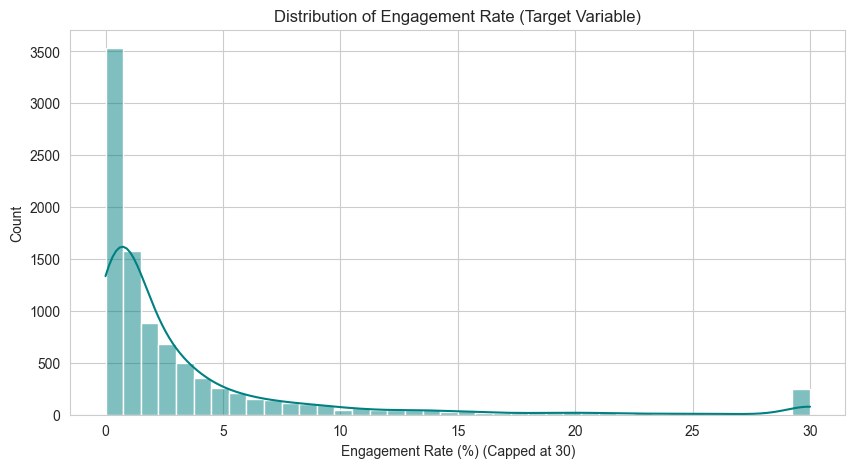

In [209]:
# Statistical summary and distribution plot
print(df['engagement_rate'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['engagement_rate'], bins=40, kde=True, color='teal')
plt.title('Distribution of Engagement Rate (Target Variable)')
plt.xlabel('Engagement Rate (%) (Capped at 30)')
plt.ylabel('Count')
plt.show()

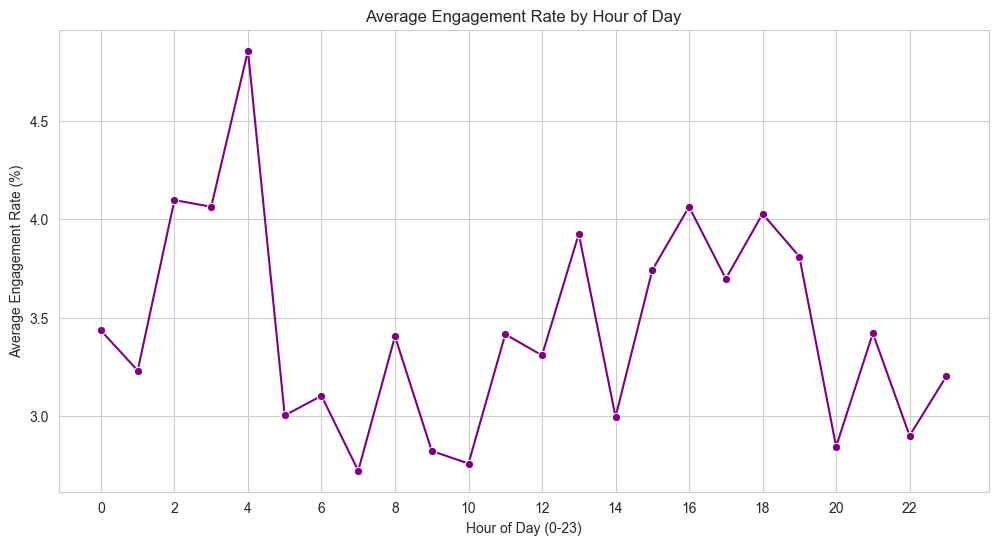

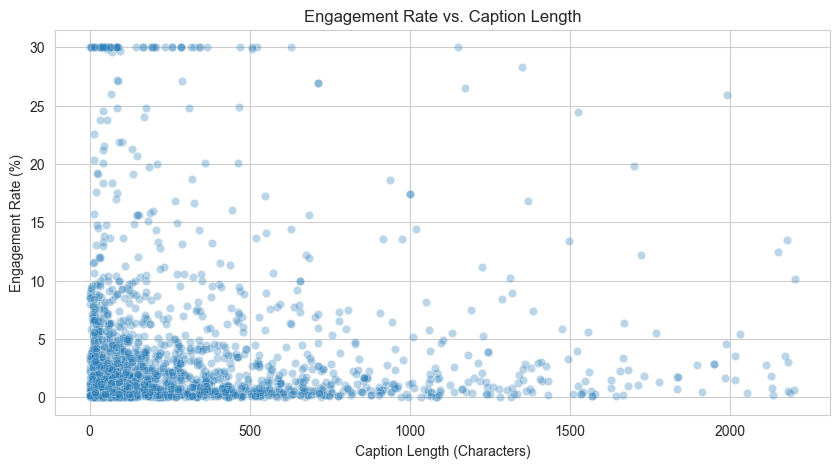

In [210]:
# Engagement by Hour of Day
engagement_by_hour = df.groupby('hour_of_day')['engagement_rate'].mean().reset_index()
sns.lineplot(x='hour_of_day', y='engagement_rate', data=engagement_by_hour, marker='o', color='purple')
plt.title('Average Engagement Rate by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Engagement Rate (%)')
plt.xticks(range(0, 24, 2))
plt.show()

# Engagement vs. Caption Length
plt.figure(figsize=(10, 5))
sns.scatterplot(x='caption_length', y='engagement_rate', data=df.sample(n=2000, random_state=42), alpha=0.3)
plt.title('Engagement Rate vs. Caption Length')
plt.xlabel('Caption Length (Characters)')
plt.ylabel('Engagement Rate (%)')
plt.show()
